# Googld AI Open Images - Visual Relationship Track

This kernel just explore the dataset for starting the competition in kaggle :)

train dataset is here:
https://www.kaggle.com/mahmoudmohsen213/vrd01

## Contents
1. Description of the Competition
2. Explore the Train Dataset
3. Explore the Test Dataset



![](https://github.com/seriousmac/img_link/blob/master/kg/visual_relation_19/0.PNG?raw=true)

This year’s Open Images V5 release enabled the second Open Images Challenge to include the following 3 tracks:

1. Object detection track for detecting bounding boxes around object instances, relaunched from 2018.

2. __Visual relationship detection track for detecting pairs of objects in particular relations, also relaunched from 2018. (This Competition)__

3. Instance segmentation track [Link to be provided when launched on July 1], brand new for 2019.

![](https://github.com/seriousmac/img_link/blob/master/kg/visual_relation_19/1.PNG?raw=true)

In this track of the Challenge, you are asked to detect pairs of objects and the relationships that connect them.

The training set contains 329 relationship triplets with 375k training samples. These include both human-object relationships (e.g. "woman playing guitar", "man holding microphone"), object-object relationships (e.g. "beer on table", "dog inside car"), and also considers object-attribute relationships (e.g."handbag is made of leather" and "bench is wooden").

![](https://github.com/seriousmac/img_link/blob/master/kg/visual_relation_19/2.PNG?raw=true)

In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import cv2

import os
print(os.listdir("../input"))
print(os.listdir("../input/vrd01"))
print(os.listdir("../input/open-images-2019-visual-relationship"))

['vrd01', 'open-images-2019-visual-relationship']
['classes-description.csv', 'challenge-2018-train-vrd.csv', 'attributes-wordtovec.csv', 'classes-wordtovec.csv', 'attributes-description.csv']
['test', 'VRD_sample_submission.csv']


# Train Dataset

In [30]:
df_train = pd.read_csv('../input/vrd01/challenge-2018-train-vrd.csv')
print('shape of train data frame:', df_train.shape)
df_sample = pd.read_csv('../input/open-images-2019-visual-relationship/VRD_sample_submission.csv')
print('shape of sample submission data frame:', df_sample.shape)

shape of train data frame: (374768, 12)
shape of sample submission data frame: (99999, 2)


In [31]:
df_train.head()

,ImageID,LabelName1,LabelName2,XMin1,XMax1,YMin1,YMax1,XMin2,XMax2,YMin2,YMax2,RelationshipLabel
0,fe58ec1b06db2bb7,/m/04bcr3,/m/083vt,0.00500,0.033125,0.580000,0.627778,0.00500,0.033125,0.580000,0.627778,is
1,82d16a22f703df5c,/m/04dr76w,/m/02gy9n,0.61200,0.735000,0.418919,0.950450,0.61200,0.735000,0.418919,0.950450,is
2,b54d41beabcfd900,/m/01mzpv,/m/083vt,0.37250,0.399375,0.706413,0.778557,0.37250,0.399375,0.706413,0.778557,is
3,4b6a08cc110d7275,/m/01mzpv,/m/01y9k5,0.17125,0.255625,0.557500,0.749167,0.20750,0.683125,0.611667,0.999167,at
4,0144cfbb726f4c72,/m/01mzpv,/m/04bcr3,0.85500,0.950000,0.561667,0.609167,0.82875,0.999375,0.568333,0.673333,at


In [32]:
df_train['RelationshipLabel'].value_counts()

is                194142
at                111493
on                 31604
holds              20986
plays               8932
interacts_with      3756
inside_of           2392
wears                836
hits                 593
under                 34
Name: RelationshipLabel, dtype: int64

In [33]:
numerical = ['XMin1', 'XMax1', 'YMin1', 'YMax1', 'XMin2', 'XMax2', 'YMin2', 'YMax2']

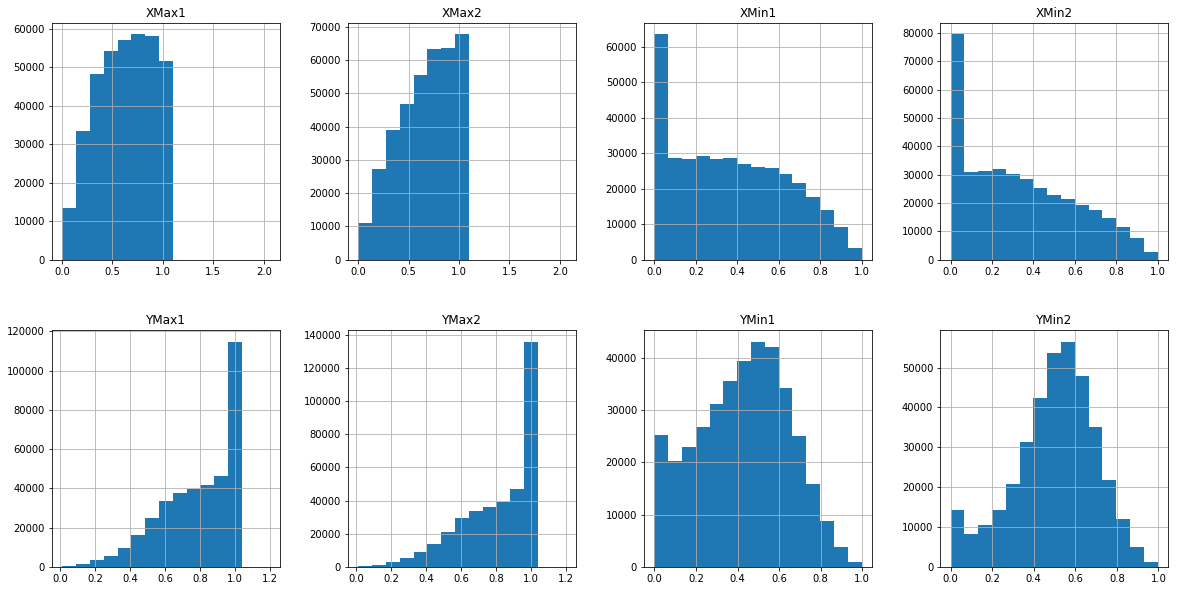

In [39]:
df_train[numerical].hist(bins=15, figsize=(20, 10), layout=(2, 4));

# Test Dataset

In [ ]:
df_sample.head()

'PredictionString' looks odd for me :(

Let' have a look!

In [ ]:
values_what = df_sample[df_sample['ImageId']=='b4c3b52a8723d431']['PredictionString'].values
values = str(values_what)[2:-2].split(' ')

print('confidence: ', values[0])

print('label 1: ', values[1])
print('XMin1: ', values[2])
print('YMin1: ', values[3])
print('XMax1: ', values[4])
print('YMax1: ', values[5])
print('Label 2: ', values[6])
print('XMin2: ', values[7])
print('YMin2: ', values[8])
print('XMax2: ', values[9])
print('YMax2: ', values[10])
print('Relation Label: ', values[11])

In [ ]:
print('confidence: ', values[12])
print('label 1: ', values[13])
print('XMin1: ', values[14])
print('YMin1: ', values[15])
print('XMax1: ', values[16])
print('YMax1: ', values[17])
print('Label 2: ', values[18])
print('XMin2: ', values[19])
print('YMin2: ', values[20])
print('XMax2: ', values[21])
print('YMax2: ', values[22])
print('Relation Label: ', values[23])

Let's have a look 10 random sample images

In [ ]:
image_filenames = os.listdir("../input/open-images-2019-visual-relationship/test")

import random
for i in range(10):
    index = random.randrange(len(image_filenames))
    path = "../input/open-images-2019-visual-relationship/test" + "/" + image_filenames[index]
    src_img = cv2.imread(path)
    fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.imshow(cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB))
    plt.show()